In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [10]:
# df = pd.read_parquet('df_clima_sp.parquet') 
df = pd.read_parquet('df_test.parquet') 
df

,preciptacao,percentage,pressao_atm,pressao_atm_max,pressao_atm_min,temperatura,temperatura_orvalho,temperatura_max,temperatura_min,temperatura_orvalho_max,temperatura_orvalho_min,umidade_rel_ar_max,umidade_rel_ar_min,umidade_rel_ar,velocidade_vento,data
0,0.0,7.0,925.6,925.6,925.2,22.8,16.9,23.0,22.7,17.3,16.8,71.0,68.0,69.0,2.6,2019-01-01 00:00:00
1,0.0,7.0,926.0,926.0,925.6,22.3,16.8,22.8,22.3,16.9,16.4,71.0,68.0,71.0,2.5,2019-01-01 01:00:00
2,0.0,7.0,925.5,926.0,925.5,22.1,17.0,22.3,22.1,17.1,16.8,73.0,71.0,73.0,2.1,2019-01-01 02:00:00
3,0.0,7.0,924.7,925.5,924.7,21.6,17.1,22.1,21.6,17.2,17.0,76.0,73.0,76.0,1.6,2019-01-01 03:00:00
4,0.0,7.0,924.4,924.7,924.4,21.6,17.1,21.6,21.5,17.2,17.1,76.0,75.0,76.0,2.2,2019-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84708,1.6,NaN,923.2,923.3,922.5,20.9,19.1,23.9,20.9,20.9,19.0,90.0,80.0,90.0,2.6,2023-10-31 19:00:00
84709,0.2,NaN,922.8,923.3,922.5,20.7,19.2,20.8,20.5,19.2,18.6,91.0,88.0,91.0,2.5,2023-10-31 20:00:00
84710,0.0,NaN,923.4,923.6,922.8,20.6,19.4,21.0,20.4,19.7,19.2,94.0,91.0,93.0,0.7,2023-10-31 21:00:00
84711,0.0,NaN,923.8,923.9,923.4,20.2,19.2,20.7,20.2,19.6,19.1,94.0,92.0,94.0,0.8,2023-10-31 22:00:00


In [3]:
df = df.ffill()

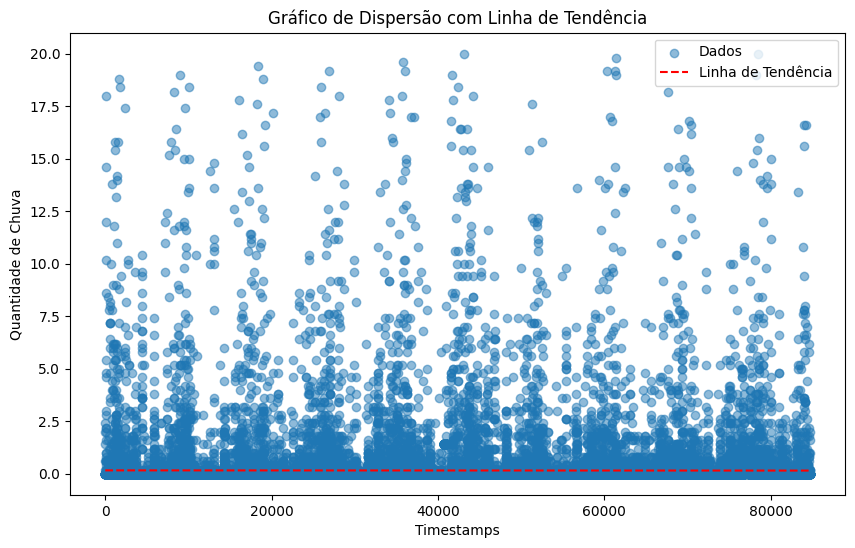

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['preciptacao'], alpha=0.5, label='Dados')
z = np.polyfit(range(len(df)), df['preciptacao'], 1)
p = np.poly1d(z)
plt.plot(df.index, p(range(len(df))), 'r--', label='Linha de Tendência')
plt.title('Gráfico de Dispersão com Linha de Tendência')
plt.xlabel('Timestamps')
plt.ylabel('Quantidade de Chuva')
plt.legend()
plt.show()

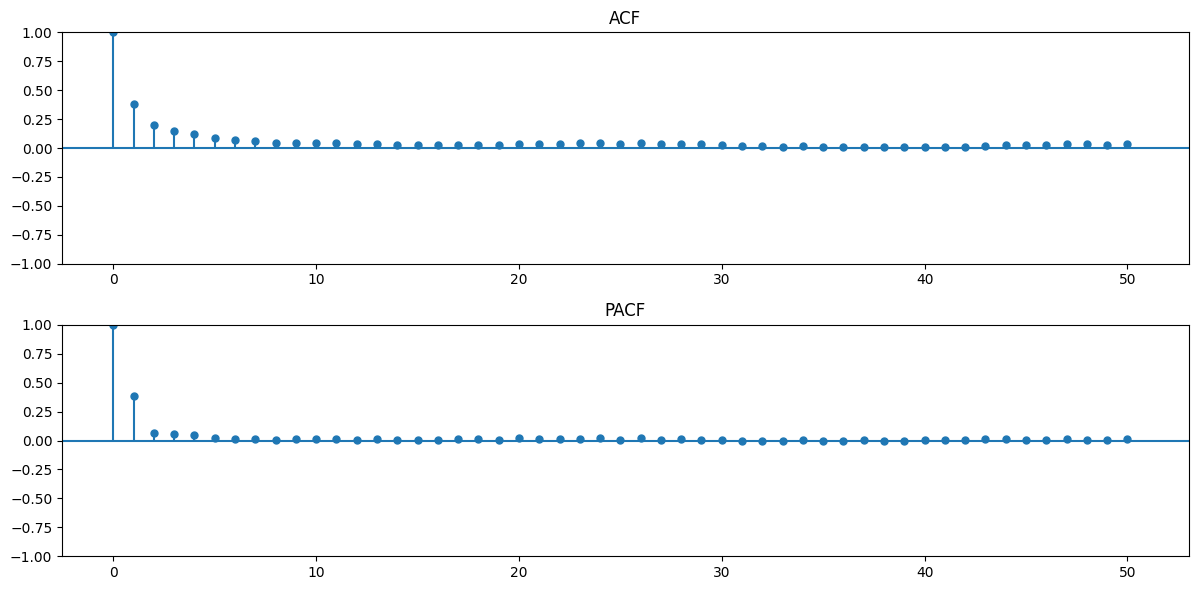

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plot_acf(df['preciptacao'], ax=plt.gca(), title='ACF')
plt.subplot(2, 1, 2)
plot_pacf(df['preciptacao'], ax=plt.gca(), title='PACF')
plt.tight_layout()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

# Teste de Dickey-Fuller Aumentado (ADF)
result = adfuller(df['preciptacao'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -33.352287135109755
p-value: 0.0
Critical Values:
   1%: -3.4304273063462967
   5%: -2.8615741681253266
   10%: -2.566788186509439


In [11]:
corr = df.corr()
corr

,preciptacao,percentage,pressao_atm,pressao_atm_max,pressao_atm_min,temperatura,temperatura_orvalho,temperatura_max,temperatura_min,temperatura_orvalho_max,temperatura_orvalho_min,umidade_rel_ar_max,umidade_rel_ar_min,umidade_rel_ar,velocidade_vento,data
preciptacao,1.000000,0.079760,-0.075943,-0.070564,-0.085730,-0.023191,0.105113,0.008278,-0.019212,0.106456,0.094238,0.110542,0.076923,0.117615,0.010326,-0.009964
percentage,0.079760,1.000000,-0.528573,-0.531930,-0.528739,0.332898,0.550376,0.319621,0.351182,0.560517,0.540974,0.114261,0.095525,0.103994,-0.000205,-0.085324
pressao_atm,-0.075943,-0.528573,1.000000,0.996725,0.996831,-0.505261,-0.352200,-0.506135,-0.534330,-0.370640,-0.327154,0.188403,0.185624,0.171554,-0.006552,-0.027335
pressao_atm_max,-0.070564,-0.531930,0.996725,1.000000,0.996949,-0.487020,-0.357619,-0.489340,-0.517957,-0.372135,-0.333647,0.171021,0.168152,0.152409,0.001000,-0.026645
pressao_atm_min,-0.085730,-0.528739,0.996831,0.996949,1.000000,-0.490455,-0.356827,-0.493584,-0.520418,-0.372928,-0.331885,0.172916,0.171979,0.155161,-0.007213,-0.028099
temperatura,-0.023191,0.332898,-0.505261,-0.487020,-0.490455,1.000000,0.292627,0.986601,0.987425,0.373262,0.224628,-0.629096,-0.658901,-0.656688,0.112795,-0.077270
temperatura_orvalho,0.105113,0.550376,-0.352200,-0.357619,-0.356827,0.292627,1.000000,0.281892,0.316918,0.984257,0.979291,0.518556,0.458942,0.501790,-0.001701,-0.046797
temperatura_max,0.008278,0.319621,-0.506135,-0.489340,-0.493584,0.986601,0.281892,1.000000,0.982730,0.362774,0.200932,-0.638052,-0.689245,-0.656656,0.140984,-0.074784
temperatura_min,-0.019212,0.351182,-0.534330,-0.517957,-0.520418,0.987425,0.316918,0.982730,1.000000,0.389466,0.250107,-0.617783,-0.633513,-0.621376,0.117473,-0.080200
temperatura_orvalho_max,0.106456,0.560517,-0.370640,-0.372135,-0.372928,0.373262,0.984257,0.362774,0.389466,1.000000,0.963839,0.457964,0.383511,0.421512,0.029463,-0.044610


In [12]:
spearman_corr = df.corr(method='spearman')
spearman_corr


,preciptacao,percentage,pressao_atm,pressao_atm_max,pressao_atm_min,temperatura,temperatura_orvalho,temperatura_max,temperatura_min,temperatura_orvalho_max,temperatura_orvalho_min,umidade_rel_ar_max,umidade_rel_ar_min,umidade_rel_ar,velocidade_vento,data
preciptacao,1.000000,0.129709,-0.086531,-0.081661,-0.096246,-0.087041,0.180491,-0.072994,-0.075137,0.169627,0.179899,0.267272,0.241951,0.276931,0.016572,0.014437
percentage,0.129709,1.000000,-0.524519,-0.527876,-0.524478,0.369883,0.581808,0.353580,0.389793,0.590572,0.573828,0.087342,0.072335,0.078911,-0.007979,-0.091748
pressao_atm,-0.086531,-0.524519,1.000000,0.996304,0.996424,-0.510639,-0.396743,-0.507542,-0.539033,-0.410697,-0.375173,0.173589,0.173500,0.159733,0.005409,-0.010739
pressao_atm_max,-0.081661,-0.527876,0.996304,1.000000,0.996579,-0.495692,-0.401548,-0.493489,-0.525178,-0.412176,-0.381250,0.159569,0.159334,0.145128,0.012133,-0.010213
pressao_atm_min,-0.096246,-0.524478,0.996424,0.996579,1.000000,-0.498038,-0.401471,-0.496570,-0.526885,-0.413261,-0.380208,0.159170,0.160697,0.145085,0.004996,-0.011267
temperatura,-0.087041,0.369883,-0.510639,-0.495692,-0.498038,1.000000,0.384318,0.988724,0.986250,0.448419,0.323685,-0.567916,-0.610497,-0.598758,0.091725,-0.082187
temperatura_orvalho,0.180491,0.581808,-0.396743,-0.401548,-0.401471,0.384318,1.000000,0.366995,0.412027,0.985261,0.980573,0.429667,0.380495,0.415863,-0.003274,-0.044395
temperatura_max,-0.072994,0.353580,-0.507542,-0.493489,-0.496570,0.988724,0.366995,1.000000,0.982295,0.433169,0.297688,-0.583468,-0.642896,-0.606753,0.115314,-0.078794
temperatura_min,-0.075137,0.389793,-0.539033,-0.525178,-0.526885,0.986250,0.412027,0.982295,1.000000,0.469300,0.354555,-0.550858,-0.578158,-0.558160,0.094708,-0.085890
temperatura_orvalho_max,0.169627,0.590572,-0.410697,-0.412176,-0.413261,0.448419,0.985261,0.433169,0.469300,1.000000,0.965734,0.375919,0.312340,0.346134,0.025170,-0.043021


<Axes: >

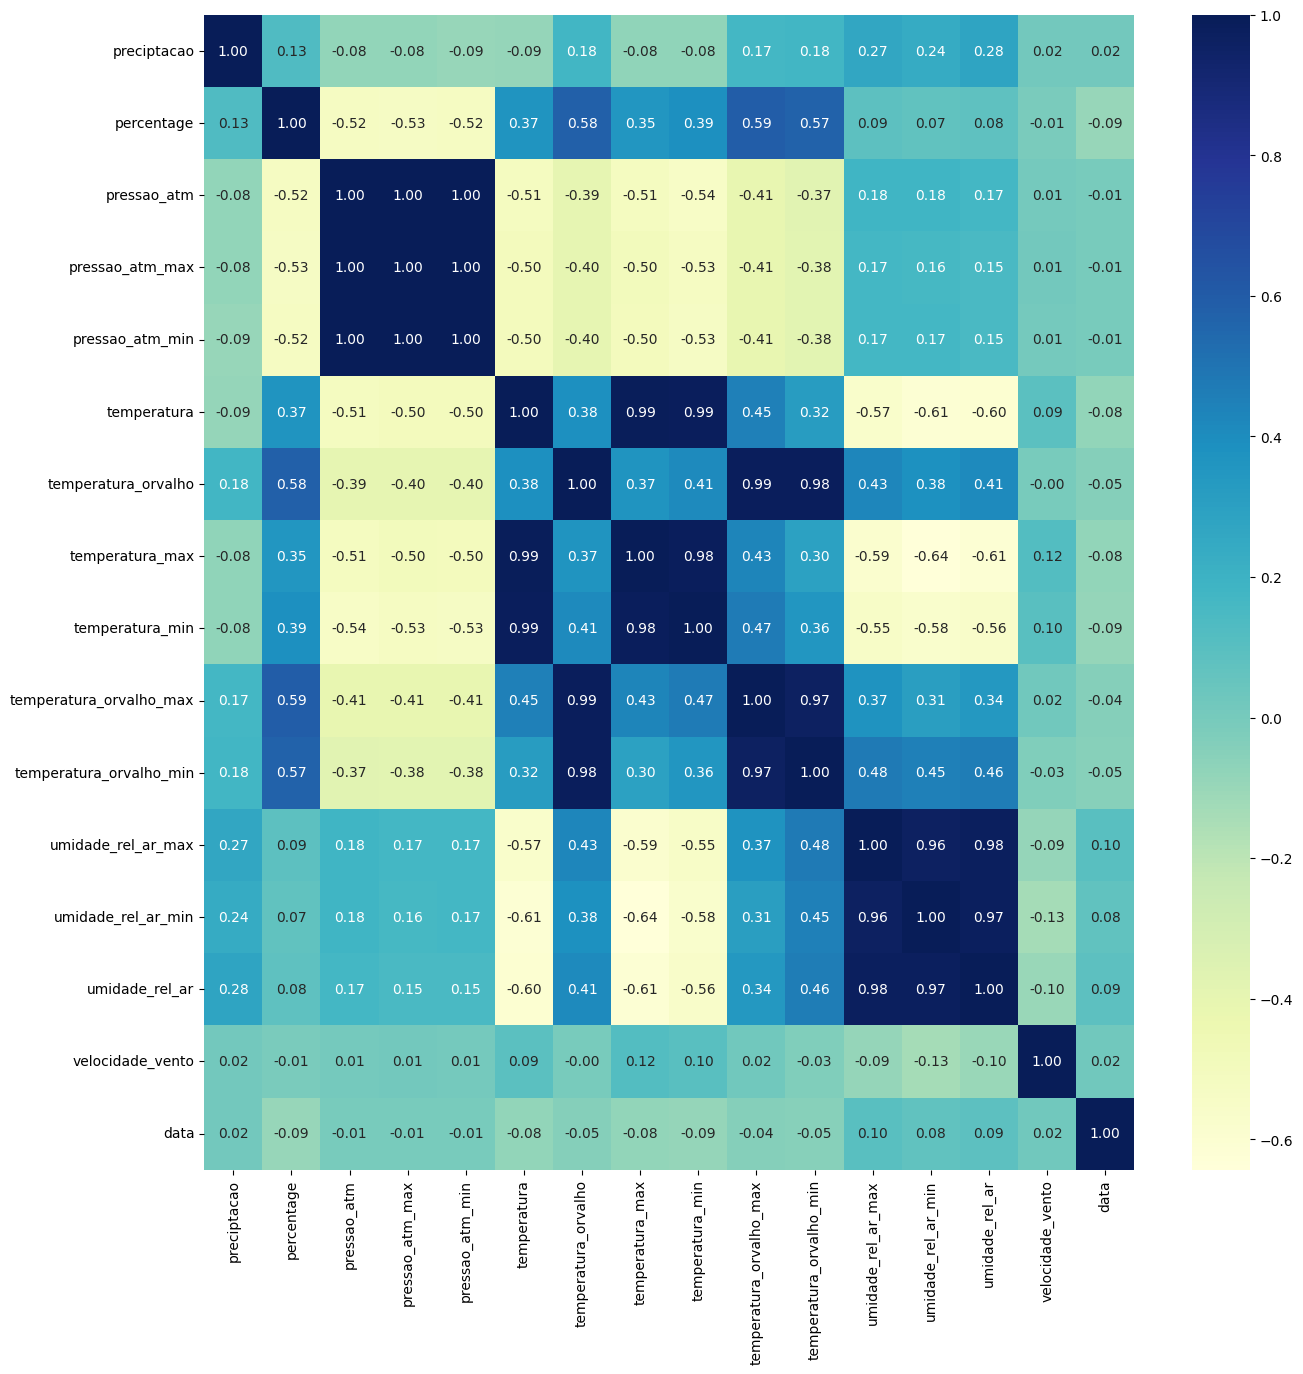

In [19]:
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap="YlGnBu")
